In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10,6)

## Test of Homogeneity

Are the color distributions the same for milk chocolate M&Ms, peanut M&Ms, and caramel M&Ms?

The $\chi^2$-**test of homogeneity** tests the null hypothesis that the distribution of a categorical variable (color) is the same for several population (milk, peanut, caramel). It assumes that the samples are drawn independently within and across the populations. To see how the test works, let's look at the survival data for the Titanic.

|  | First | Second | Third | Crew |
|:---:|:---:|:---:|:---:|:---:|
| Survived | 202 | 118 | 178 | 215 |
| Died | 123 | 167 | 528 | 698 |

Note that in this case we are not sampling from a population: The data are not a random sample of the people on board, rather the data represent the whole population.

So in this case the chance process resulting in survival or death is not in the sampling, but the result of the random events occuring when looking for a way out of the ship, getting into a life boat or into the water, being rescued out of the water in time etc.

Then the 325 observations about first class passengers represent 325 independent draws from a probability histogram that gives a certain chance for survival. The 285 observations about second class passengers are drawn from the probability histogram for second class passengers, which may be different. The null hypothesis says that the probability of survival is the same for all four probability histograms.

In order to compute the table of expeected entries, note that under $H_0$ the probability of survival is the same for all populations. So we can estimate this probability by pooling the data: in total there were 713 survivors among the 2,229 people on board so we estimate the probability of survival as $\frac{713}{2229}=32\%$

So the expected number of surviving first class passengers is $32\% \times 325=104.0$
|  | First | Second | Third | Crew |
|:---:|:---:|:---:|:---:|:---:|
| Survived | 104.0 | 91.2 | 225.8 | 292.1 |
| Died | 221.0 | 193.8 | 480.1 | 620.8 |

Now we can compute the chi-square statistic over all 8 cells in the table:

$$\chi^2 = \sum_{all~cells} \frac{(observed - expected)^2}{expected}$$

$$=\frac{(202-104)^2}{104} + ... = 192.2$$

In this case the degrees of freedom <br>
= (no. of columns - 1) $\times$ (no. of rows -1 ) = <br>
$(4-1) \times (2-1)=3$


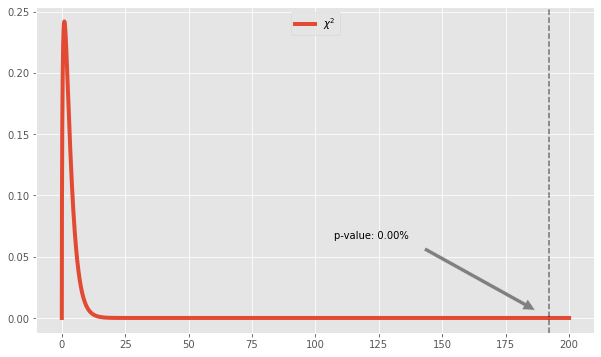

In [10]:
df = 3
x = np.arange(0, 200, 0.01)
y = chi2.pdf(x, df)
ax = sns.lineplot(x=x, y=y, label=r"$\chi^2$", linewidth=4)

# Plot the vertical line
_ = ax.axvline(192.2, color='k', alpha=0.5, linestyle='--')

# Plot the text
_ = ax.annotate(f"p-value: {y[x>192.2].sum():0.2f}%", xy=(192.2,0.00), xycoords='data',
            xytext=(0.6, 0.3), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.1),
            horizontalalignment='center', verticalalignment='center',
            )

# Plot hatched area
_ = ax.fill_between(x, y, where=(x > 192.2) , interpolate=True, color='#5fb0c7', hatch= 'x', alpha=0.50)

"So then we have to compare the chi-square value of 192.2, against a chi-square distribution with three degrees of freedom. If you look at the picture, you see that this 192 is all the way out there and there's essentially no area to the right so the p-value is 0%, and that is very strong evidence against the null hypothesis. So the conclusion would be that the chances of survival depended on the ticket class."

## Testing independence

Is gender (male/female) related to voting preference (liberal/conservative)?

Now we have two categorical variables: gender and voting preference. The null hypothesis is that the two variables are independent. The alternative hypothesis is that there is some kind of association.

The chi-square test can be used to test this null hypothesis:
After sampling from the population the counts are recorded in a $2 \times 2$ table. The $\chi^2$-statistic and p-value are computed exactly as in the case of testing homogeneity.

Comparing these two uses of the $\chi^2$-test:

|  | Sample | Research question | 
|:---:|:---:|:---:|
| $\chi^2$-test of homogeneity | single categorical variable measured on several samples |   Are the groups homogeneous (have the same distribution of the categorical variable)? |
| $\chi^2$-test of independence | two categorical variables measured on one sample |  Are the two categorical variables independent? | 